In [33]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [34]:
def ftcs(T, nt, alpha, dt, dx, dy):
    
    j_mid = int((numpy.shape(T)[0])/2) #this forces j_mid, i_mid to be integers so we can use them as indices?
    i_mid = int((numpy.shape(T)[1])/2)
    
    #Need to make a 2D Array, T
    
    for n in range(nt):
        
        Tn = T.copy() #Remember, T[y,x]
        
        #The below line implements the 2D FTCS Discretization
        
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + alpha*((dt/dy**2)*(Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[:-2,1:-1])+\
                                              (dt/dx**2)*(Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,:-2]))
        
        #This next line enforces the Neumann BC's
        T[-1,:]=T[-2,:]   #Y side
        T[:,-1]=T[:,-2]   #X side
        
        #This line will tell us if the temperature limit of 70 degrees is reached
        if T[j_mid, i_mid] >= 70:
            print("Center of chip has reached 70C at time {0:.2f}s.".format(dt*n))
            break
            
    if T[j_mid, i_mid]<70:
        print("Center has not reached 70C yet, it is only {0:.2f]C.".format(T[j_mid, i_mid]))
        
    return T
    
    

In [35]:
L = 1e-2 #distance in meters, equals 1 cm
H = 1e-2

nx = 21
ny = 21
nt = 500

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0, L, nx) #Creates my plotting grid points
y = numpy.linspace(0, H, ny) #Creates my plotting grid points

alpha = 1e-4

Ti = numpy.ones((ny,nx))*20 #Creates a 21 by 21 grid with al values equal to 20

#Dirichlet Boundary conditions
Ti[0,:]=100
Ti[:,0]=100




Apply the new stability criteria

In [36]:
sigma = 0.25

dt = sigma*min(dx,dy)**2/alpha

T = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

Center of chip has reached 70C at time 0.16s.


cool

and now we make a countour plot

In [37]:
mx, my = numpy.meshgrid(x,y)

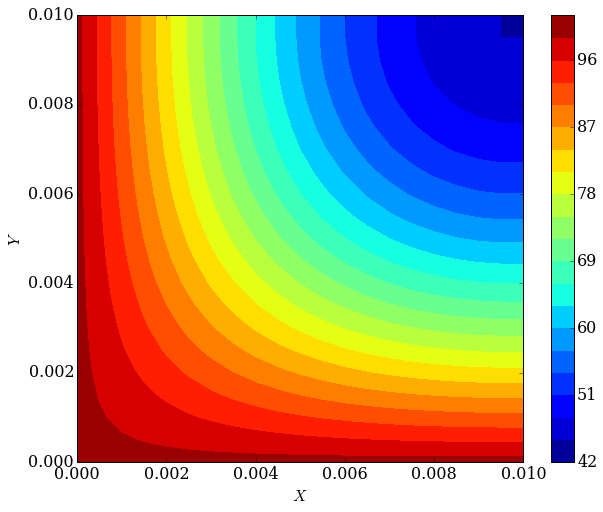

In [38]:
pyplot.figure(figsize=(10,8))
pyplot.contourf(mx,my,T,20)
pyplot.xlabel('$X$')
pyplot.ylabel('$Y$')
pyplot.colorbar();